In [2]:
import pandas as pd
from nltk.corpus import stopwords
sw = stopwords.words('English')
from collections import Counter
from nltk.probability import FreqDist
import numpy as np
from string import punctuation
punctuation = set(punctuation)

In [8]:
df = pd.read_csv('songs_df.csv')
#df = df.drop(columns= ['Unnamed: 0'])

In [21]:
df['Lyrics'].fillna('NA', inplace=True)

In [23]:
df['Top_Genre'] = new_genre_list

In [15]:
lyrics = df["Lyrics"]

In [130]:
results = {'tokens': [],
            'unique_tokens': [],
            'avg_token_length': [],
            'lexical_diversity': [],
            'top_10': []}

def get_patterns(text, results_dict)  :

    total_tokens = 1
    unique_tokens = 0
    avg_token_len = 0.0
    lex_diversity = 0.0
    top_10 = Counter()
    
    txt_clean = [word.lower() for word in text.split()]
    txt_clean = [word for word in txt_clean if word.isalpha() and word not in sw]
    
    total_tokens = len(txt_clean)
    
    unique_tokens = len(set(txt_clean))
    
    txt_token_length = [len(word) for word in txt_clean]
    avg_token_len = round(np.mean(txt_token_length), 2)
    
    lex_diversity = round(len(set(txt_clean))/len(txt_clean), 2)
    

    txt_fd = FreqDist(txt_clean)
    top_10 = txt_fd.most_common(10)

    results_dict['tokens'].append(total_tokens)
    results_dict['unique_tokens'].append(unique_tokens)
    results_dict['avg_token_length'].append(avg_token_len)
    results_dict['lexical_diversity'].append(lex_diversity)
    results_dict['top_10'].append(top_10)

In [131]:
for song in lyrics:
    get_patterns(song, results)

In [132]:
df['Total Words'] = results['tokens']
df['Total Unique Words'] = results['unique_tokens']
df['Avg. Word Length'] = results['avg_token_length']
df['lexical Diversity'] = results['lexical_diversity']
df['Top 10 Words'] = results['top_10']

# Data Cleaning

In [32]:
df = pd.read_csv('songs_analysis.csv')

In [33]:
df = df.drop(columns= ['Unnamed: 0', 'speechiness', 'liveness', 'time_signature'])

In [34]:
df = df[df['Total Words'] < 350] 
df = df[df['Total Words'] > 30]

df['key'] = df['key'].astype('category')
df['mode'] = df['mode'].astype('category')

df['acousticness'] = df['acousticness'].apply(lambda x: 'non-acoustic' if x <= 0.5 else 'acoustic')
df['instrumentalness'] = df['instrumentalness'].apply(lambda x: 'instrumental' if x > 0.5 else 'lyrics' )
df['Lexical Diversity'] = df['lexical Diversity'].apply(lambda x: x*100)
df['energy'] = df['energy'].apply(lambda x: x*100)

df['danceability'] = df['danceability'].apply(lambda x: x*100)

df['valence'] = df['valence'].apply(lambda x: x*100)

df['duration_minutes'] = df['duration_ms'].apply(lambda x: x/(1000*60)%60)
df['duration_minutes'] = round(df['duration_minutes'], 2)

In [35]:
df = df.drop(columns= ['duration_ms'])
df = df.drop(columns = ['lexical Diversity'])

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'popularity'}>],
       [<AxesSubplot:title={'center':'Total Words'}>,
        <AxesSubplot:title={'center':'Total Unique Words'}>,
        <AxesSubplot:title={'center':'Avg. Word Length'}>],
       [<AxesSubplot:title={'center':'Lexical Diversity'}>,
        <AxesSubplot:title={'center':'duration_minutes'}>,
        <AxesSubplot:>]], dtype=object)

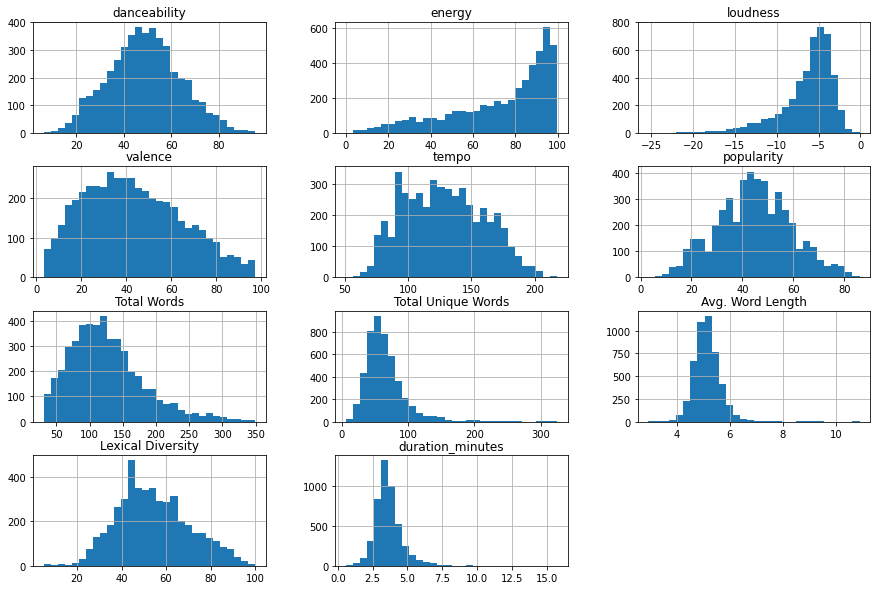

In [39]:
df.hist(bins=30, figsize=(15, 10))

In [40]:
df.describe()

,danceability,energy,loudness,valence,tempo,popularity,Total Words,Total Unique Words,Avg. Word Length,Lexical Diversity,duration_minutes
count,4742.000000,4742.000000,4742.000000,4742.000000,4742.000000,4742.000000,4742.000000,4742.000000,4742.000000,4742.000000,4742.000000
mean,48.814831,73.387135,-6.348370,43.033629,128.419300,44.633488,126.324336,65.091944,5.139083,54.307887,3.651944
std,15.148766,23.587919,3.327415,21.648272,31.405081,14.608864,56.280790,30.931908,0.488869,16.206642,1.027331
min,6.210000,0.002030,-25.345000,3.180000,50.846000,3.000000,31.000000,6.000000,2.930000,5.000000,0.580000
25%,38.500000,58.900000,-7.536500,25.925000,102.747000,35.000000,86.000000,46.000000,4.830000,43.000000,3.062500
50%,48.600000,82.000000,-5.451000,40.900000,127.281000,45.000000,118.000000,60.000000,5.110000,53.000000,3.520000
75%,58.700000,92.600000,-4.147250,58.400000,152.057750,54.000000,155.000000,77.000000,5.400000,65.000000,4.070000
max,95.300000,99.800000,-0.113000,97.200000,217.941000,86.000000,349.000000,325.000000,10.880000,100.000000,15.770000


In [38]:
#This will be used in R

df.to_csv('songs_transformed.csv')

# Data Visualizations/EDA

Text(0.5, 1.0, 'Audio feature trends among general likely songs')

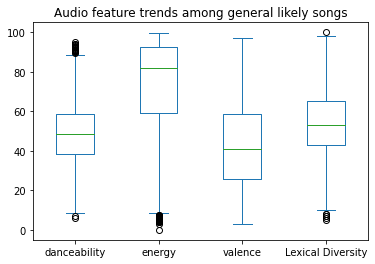

In [79]:
df_box = df[["danceability", "energy", "valence", "Lexical Diversity"]]
df_box = df_box.plot.box()

df_box.set_title('Audio feature trends among general likely songs')

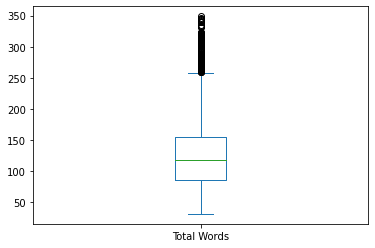

In [17]:
df_box = df[["Total Words"]]
df_box = df_box.plot.box()
df_box.set_title('Dstribution of the total amount of words in a song')

In [192]:
df_significant = df[['danceability', 'energy', 'loudness', 'valence', 'tempo', 'popularity', 'Total Words',
                         'Lexical Diversity', 'duration_minutes']]
mean_table = df_significant.mean()
mean_df = pd.DataFrame(mean_table, columns = ['Mean'])
mean_df

,Mean
danceability,48.814831
energy,73.387135
loudness,-6.348370
valence,43.033629
tempo,128.419300
popularity,44.633488
Total Words,126.324336
Lexical Diversity,54.307887
duration_minutes,3.651944


## Subset top 10 percent

In [180]:
df_sorted = df.sort_values('popularity', ascending = False)
percentage=round(len(df_sorted)/100*10)
top_10_df = df_sorted.head(percentage)  
the_rest = df_sorted.iloc[percentage:len(df_sorted),:]

Text(0.5, 1.0, 'Audio feature trends among top 10%')

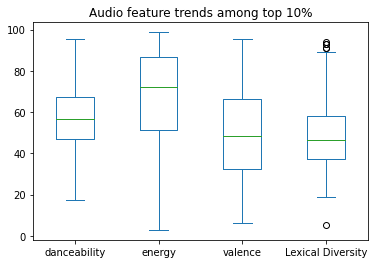

In [181]:
top_10_box = top_10_df[["danceability", "energy", "valence", "Lexical Diversity"]]
top_10_box = top_10_box.plot.box()

top_10_box.set_title('Audio feature trends among top 10%')

In [189]:
top_10_table = top_10_df[['danceability', 'energy', 'loudness', 'valence', 'tempo', 'popularity', 'Total Words',
                         'Lexical Diversity', 'duration_minutes']]

In [190]:
top_10_table.describe()

,danceability,energy,loudness,valence,tempo,popularity,Total Words,Lexical Diversity,duration_minutes
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,56.850211,67.507468,-6.594008,49.517785,126.839445,70.761603,151.449367,48.776371,3.478713
std,15.028830,22.767999,3.541298,21.678590,30.360527,5.295109,67.266962,15.604811,0.769535
min,17.300000,2.830000,-25.021000,6.350000,61.932000,64.000000,31.000000,5.000000,0.660000
25%,47.125000,51.125000,-8.001250,32.400000,103.953750,66.000000,101.000000,37.000000,3.050000
50%,56.800000,72.000000,-5.459000,48.600000,123.957000,69.000000,144.000000,46.500000,3.440000
75%,67.150000,86.750000,-4.160750,66.225000,145.489000,74.750000,192.750000,58.000000,3.830000
max,95.300000,98.700000,-1.794000,95.400000,210.857000,86.000000,345.000000,94.000000,7.040000


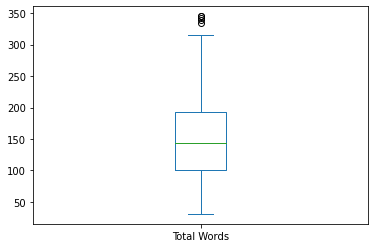

In [186]:
top_10_words_box = top_10_df[["Total Words"]]
top_10_words_box = top_10_words_box.plot.box()

In [191]:
mean_table = top_10_table.mean()
mean_df = pd.DataFrame(mean_table, columns = ['Mean'])
mean_df

,Mean
danceability,56.850211
energy,67.507468
loudness,-6.594008
valence,49.517785
tempo,126.839445
popularity,70.761603
Total Words,151.449367
Lexical Diversity,48.776371
duration_minutes,3.478713


## Subset on Genre

In [72]:
genre_subset = df[df["Top_Genre"].isin(['emo', 'brooklyn indie', 'alternative metal',
                                        'modern rock', 'pop punk'])]
#not_genre_subset = df[df["Top_Genre"].isin(['emo', 'brooklyn indie', 'alternative metal',
#                                        'modern rock', 'pop punk']) == False]

In [75]:
genre_subset = genre_subset.sort_values('popularity', ascending = False)

In [ ]:
#genre_subset.to_csv('genre_subset.csv')

Text(0.5, 1.0, 'Audio feature trends among relevant genres')

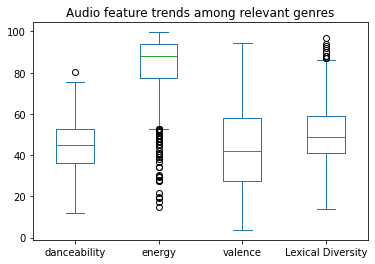

In [77]:
genre_box = genre_subset[["danceability", "energy", "valence", "Lexical Diversity"]]
genre_box = genre_box.plot.box()

genre_box.set_title('Audio feature trends among relevant genres')

<AxesSubplot:>

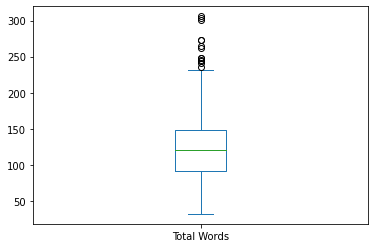

In [187]:
words_box = genre_subset['Total Words']
genre_box = words_box.plot.box()

genre_box

In [188]:
mean_table = genre_subset.mean()
mean_df = pd.DataFrame(mean_table, columns = ['Mean'])
mean_df

C:\Users\jackc\AppData\Local\Temp\ipykernel_55248\1686738932.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_table = genre_subset.mean()


,Mean
danceability,44.555877
energy,82.676492
loudness,-5.072877
valence,43.250796
tempo,133.173246
popularity,44.641953
Total Words,124.162749
Total Unique Words,60.180832
Avg. Word Length,5.124629
Lexical Diversity,50.839060


## Top 20% Genre Subset

In [194]:
genre_sub_sort = genre_subset.sort_values('popularity', ascending = False)

In [195]:
percentage=round(len(genre_sub_sort)/100*20) 
top_20_genre = genre_sub_sort.head(percentage)
bottom_80_genre = genre_sub_sort.iloc[percentage:len(genre_sub_sort),:]

Text(0.5, 1.0, 'Top 20%')

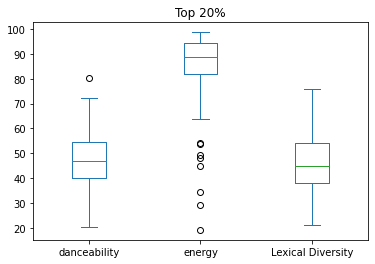

In [197]:
top_20_genre_box = top_20_genre[["danceability", "energy", 'Lexical Diversity']]
box = top_20_genre_box.plot.box()

box.set_title('Top 20%')

In [199]:
mean_table = top_20_genre.mean()
mean_df = pd.DataFrame(mean_table, columns = ['Mean'])
mean_df

C:\Users\jackc\AppData\Local\Temp\ipykernel_55248\598910969.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_table = top_20_genre.mean()


,Mean
danceability,47.097297
energy,84.321622
loudness,-4.740198
valence,47.618739
tempo,134.436658
popularity,67.324324
Total Words,142.702703
Total Unique Words,62.693694
Avg. Word Length,5.049550
Lexical Diversity,45.891892


Text(0.5, 1.0, 'Bottom 80%')

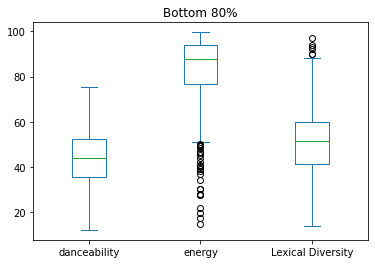

In [198]:
bottom_80_box = bottom_80_genre[["danceability", "energy", 'Lexical Diversity']]
box = bottom_80_box.plot.box()

box.set_title('Bottom 80%')

In [200]:
mean_table = bottom_80_genre.mean()
mean_df = pd.DataFrame(mean_table, columns = ['Mean'])
mean_df

C:\Users\jackc\AppData\Local\Temp\ipykernel_55248\3264759671.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_table = bottom_80_genre.mean()


,Mean
danceability,43.917647
energy,82.263348
loudness,-5.156423
valence,42.153869
tempo,132.855964
popularity,38.945701
Total Words,119.506787
Total Unique Words,59.549774
Avg. Word Length,5.143484
Lexical Diversity,52.081448


## Bottom 80%

## Top 20% OG Dataset

In [173]:
df_sorted_pop = df.sort_values('popularity', ascending = False)

<AxesSubplot:>

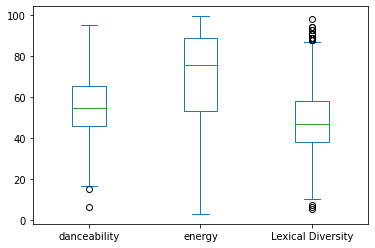

In [174]:
percentage = round(len(df)/100*20) 
top_20 = df_sorted_pop.head(percentage)  
bottom_80 = df_sorted_pop.iloc[percentage:len(df_sorted_pop),:]


top_20_box = top_20[["danceability", "energy", 'Lexical Diversity']]
top_20_box.plot.box()

#top_30_box.set_title('top 30%')

## Comparing Top 20% OG vs. Subset

Text(0.5, 1.0, 'Significant Audio Features (Top 20% Related Songs)')

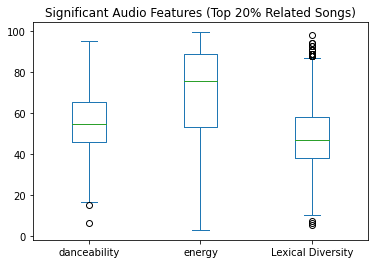

In [175]:
top_20_box = top_20_box.plot.box()
top_20_box.set_title('Significant Audio Features (Top 20% Related Songs)')

Text(0.5, 1.0, 'Significant Audio Features (Top 20% Genre Subset)')

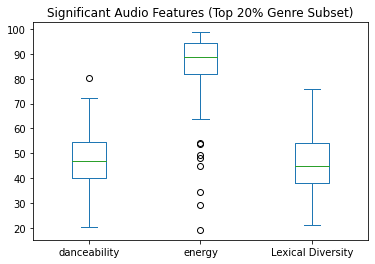

In [167]:
top_20_genre_box = top_20_genre_box.plot.box()
top_20_genre_box.set_title('Significant Audio Features (Top 20% Genre Subset)')